<a href="https://colab.research.google.com/github/anelglvz/Deep_Learning/blob/main/Intro_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANTE: Antes de iniciar cambiar entorno de ejecución a GPU

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

# Second, import PyTorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Solo para que al mostrarnos los arreglos no nos de los valores grandes en notación científica
np.set_printoptions(suppress=True)

# First Example

In [ ]:
#stopwords.words()
stopwords.words('english')

Import the data

In [ ]:
datos=pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana8/spam_ham_dataset.csv',
                  usecols=['text','label_num'] )
datos.columns=['text','spam']

print(datos.shape)
datos.head()

(5171, 2)


,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
datos['spam'].value_counts()

0    3672
1    1499
Name: spam, dtype: int64

In [ ]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords + 'subject'
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')+(['subject'])) + r')\b\s*')
  texto = stop.sub('', texto) 

  #quita puntuaciones y números
  texto = re.sub('[^a-z]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  st = PorterStemmer()
  texto = texto.split()
  texto = ' '.join([st.stem(i) for i in texto])
  
  return(texto)

In [ ]:
datos['text_pp'] = datos['text'].apply(preprocesar)
datos

,text,spam,text_pp
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpln...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year ...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas d...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu unders...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,put ft transport volum decreas contract thank ...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,follow nom hpl take extra mmcf weekend tri nex...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpin daili ga nomin juli mention earlier hop...
5169,Subject: industrial worksheets for august 2000...,0,industri worksheet august activ attach workshe...


In [ ]:
tfidf = TfidfVectorizer(min_df=3) #matrix of TF-IDF features
mdt_tfidf = tfidf.fit_transform(datos['text_pp']) 
palabras = tfidf.get_feature_names()
MDT = pd.DataFrame(mdt_tfidf.todense(), 
                              index=datos.index, 
                              columns=palabras)
print(MDT.shape)
MDT

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5171, 10376)


,aa,aalland,aaron,ab,aba,aback,abacu,abacustech,abandon,abash,...,zodiac,zoloft,zone,zonedubai,zonewww,zs,zu,zurich,zwallet,zyban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = MDT
y = datos['spam']

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2,  
                                                     random_state=3)

In [ ]:
class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, words, labels):
        'Initialization'
        self.labels = np.array(labels, dtype='float32')
        self.words = np.array(words, dtype='float32')

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.words)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.words[index]

        # Load data and get label
        X = torch.tensor(self.words[index])
        y = torch.tensor(self.labels[index])

        return X, y

In [ ]:
dataset_train = Dataset(X_train,y_train)
train_loader = torch.utils.data.DataLoader(dataset_train,batch_size=32,shuffle=True)

In [ ]:
dataset_test = Dataset(X_test,y_test)
test_loader = torch.utils.data.DataLoader(dataset_test,batch_size=32,shuffle=False)

Modelo

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.d1 = nn.Linear(10376, 128)
        self.d2 = nn.Linear(128, 1)

    def forward(self, x):

        x = self.d1(x)

        logits = self.d2(x)
        out = torch.sigmoid(logits)
        return out

Entrenamiento

In [ ]:
learning_rate = 0.001
num_epochs = 10
BATCH_SIZE = 32

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

Entrenamiento

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (X,y) in enumerate(train_loader):
        
        X = X.to(device)
        y = y.to(device)

        ## forward + backprop + loss
        logits = model(X)
        loss = criterion(logits, y.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, y, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 0.0015 | Train Accuracy: 71.29
Epoch: 1 | Loss: 0.0013 | Train Accuracy: 71.29
Epoch: 2 | Loss: 0.0010 | Train Accuracy: 71.29
Epoch: 3 | Loss: 0.0009 | Train Accuracy: 71.29
Epoch: 4 | Loss: 0.0007 | Train Accuracy: 71.29
Epoch: 5 | Loss: 0.0006 | Train Accuracy: 71.29
Epoch: 6 | Loss: 0.0006 | Train Accuracy: 71.29
Epoch: 7 | Loss: 0.0005 | Train Accuracy: 71.29
Epoch: 8 | Loss: 0.0004 | Train Accuracy: 71.29
Epoch: 9 | Loss: 0.0004 | Train Accuracy: 71.29


In [ ]:
test_acc = 0.0
for i, (words_t, labels_t) in enumerate(test_loader, 0):
    images_td = words_t.to(device)
    labels_td = labels_t.to(device)
    outputs = model(images_td)
    test_acc += get_accuracy(outputs, labels_td, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 71.19


In [ ]:
outputs

tensor([[2.5716e-06],
        [4.5151e-07],
        [3.1919e-05],
        [1.3245e-09],
        [2.4362e-06],
        [3.1155e-04],
        [9.9959e-01],
        [9.9958e-01],
        [4.3466e-01],
        [9.9993e-01],
        [1.5169e-11]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
labels_t

tensor([0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.])

# Second Example

In [ ]:
## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

In [ ]:
transform(np.array([[1,2,3],[1,2,3]]))

tensor([[[1, 2, 3],
         [1, 2, 3]]])

In [ ]:
torch.tensor(np.array([[1,2,3],[1,2,3]]))

tensor([[1, 2, 3],
        [1, 2, 3]])

Import the data

In [ ]:
## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                          download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)  # num_workers, que denota el número de procesos que generan batches en paralelo.

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                          download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)  # num_workers, que denota el número de procesos que generan batches en paralelo

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



tensor([9, 5, 8, 9, 9, 6, 1, 7, 1, 3, 8, 0, 3, 0, 9, 6, 0, 6, 3, 3, 2, 1, 8, 6,
        5, 2, 7, 3, 1, 4, 0, 6])


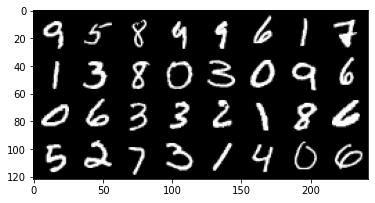

In [ ]:
## functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))
print(labels)

In [ ]:
for images, labels in trainloader:
    print(images)
    print(labels)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
for images, labels in trainloader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


Modelo

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        #self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(28*28, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        #x = self.conv1(x)
        #x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = torch.flatten(x,start_dim = 1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

In [ ]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

Entrenamiento

In [ ]:
learning_rate = 0.001
num_epochs = 5
BATCH_SIZE = 32

In [ ]:
torch.cuda.is_available()

False

In [ ]:
torch.cuda.get_device_name(0)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 1.5818 | Train Accuracy: 90.07
Epoch: 1 | Loss: 1.5209 | Train Accuracy: 94.65
Epoch: 2 | Loss: 1.5057 | Train Accuracy: 96.06
Epoch: 3 | Loss: 1.4976 | Train Accuracy: 96.81
Epoch: 4 | Loss: 1.4919 | Train Accuracy: 97.32


In [ ]:
test_acc = 0.0
for i, (images_t, labels_t) in enumerate(testloader, 0):
    images_td = images_t.to(device)
    labels_td = labels_t.to(device)
    outputs = model(images_td)
    test_acc += get_accuracy(outputs, labels_td, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 96.95


In [ ]:
num_t = images_td.shape[0]
print('Number of images in test set: ',num_t)

Number of images in test set:  16


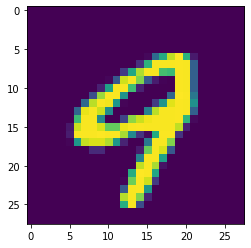

In [ ]:
# Check an image in the test set
i = 8
plt.imshow(images_t[i][0])

In [ ]:
labels_t[i]

tensor(9)

In [ ]:
outputs[i]

tensor([2.5996e-13, 4.6867e-25, 1.7835e-15, 1.0526e-14, 2.5589e-04, 2.1605e-12,
        5.6863e-15, 8.2226e-10, 3.0897e-09, 9.9974e-01],
       grad_fn=<SelectBackward0>)